In [1]:
cd ~/Desktop/Tesis/Notebooks-Git

/home/luis/Desktop/Tesis/Notebooks-Git


In [2]:
import Script as sc

# Training set construction

In [3]:
cd ~/Desktop/Tesis/

/home/luis/Desktop/Tesis


In [4]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [46]:
# Dataframes directory 
f_f4 = "/home/luis/Desktop/Tesis/F4/CSVs/WellboreF4.csv"
f_f5 = "/home/luis/Desktop/Tesis/F5/CSVs/WellboreF5.csv"
f_f10 = "/home/luis/Desktop/Tesis/F10/CSVs/WellboreF10.csv"
f_f14 = "/home/luis/Desktop/Tesis/F14/CSVs/WellboreF14.csv"

files = [f_f4,f_f5,f_f10,f_f14]

In [47]:
dfs = []
for file in files:
    df=pd.read_csv(file)
    dfs.append(df)

In [7]:
wells_txt = ["F4","F5","F10","F14"]
wells_txt = ["F4","F5","F10","F14"]
F4 = dfs[0]
F5 = dfs[1]
F10 = dfs[2]
F14 = dfs[3]
wells = [F4,F5,F10,F14]
sections  =  ['All','All','All','All']

In [8]:
wells[1].drop(["ECD","an_Temp"],axis=1,inplace=True)

## Columns in wellbores dataframes

In [9]:
i = 0
for well in wells:
    print("\nWellbore:",wells_txt[i])
    print("Logs:\n",np.sort(well.columns.values))
    print("Shape:",well.shape)
    i+=1


Wellbore: F4
Logs:
 ['BPOS' 'BVEL' 'DEPT' 'DateTime' 'GR' 'HKLD' 'ROP5' 'RPM' 'Run' 'SPPA'
 'SWOB' 'Stick_RT' 'TFLO' 'TQA' 'Well']
Shape: (96202, 15)

Wellbore: F5
Logs:
 ['BPOS' 'BVEL' 'DEPT' 'DateTime' 'GR' 'HKLD' 'ROP5' 'RPM' 'Run' 'SPPA'
 'SWOB' 'Stick_RT' 'TFLO' 'TQA' 'Well']
Shape: (42364, 15)

Wellbore: F10
Logs:
 ['BPOS' 'BVEL' 'DEPT' 'DateTime' 'GR' 'HKLD' 'ROP5' 'RPM' 'Run' 'SPPA'
 'SWOB' 'Stick_RT' 'TFLO' 'TQA' 'Well']
Shape: (101624, 15)

Wellbore: F14
Logs:
 ['BPOS' 'BVEL' 'DEPT' 'DateTime' 'GR' 'HKLD' 'ROP5' 'RPM' 'Run' 'SPPA'
 'SWOB' 'Stick_RT' 'TFLO' 'TQA' 'Well']
Shape: (47499, 15)


In [10]:
cols = wells[0].columns.difference(["DateTime","Run","Well"])
cols

Index(['BPOS', 'BVEL', 'DEPT', 'GR', 'HKLD', 'ROP5', 'RPM', 'SPPA', 'SWOB',
       'Stick_RT', 'TFLO', 'TQA'],
      dtype='object')

## Continuity in wellbore logs?

BPOS


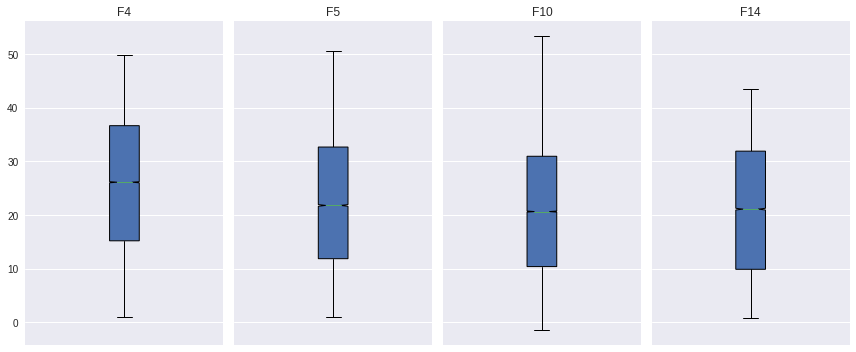

BVEL


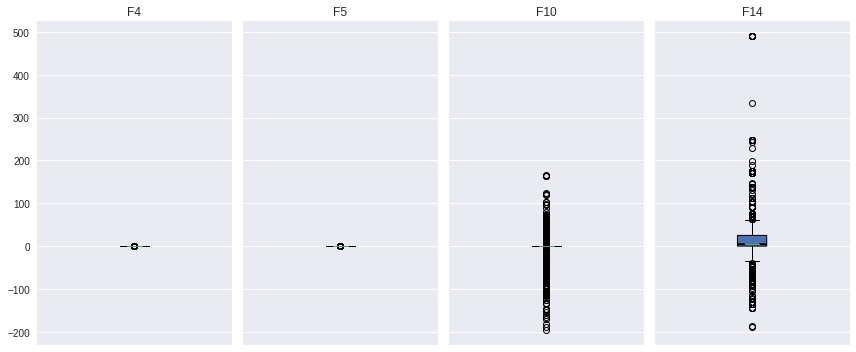

DEPT


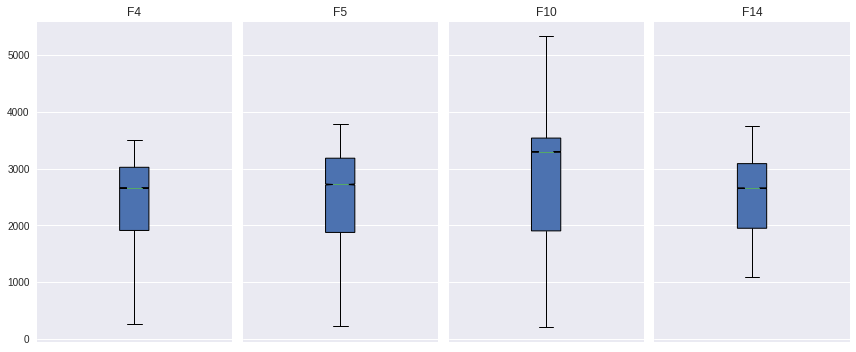

GR


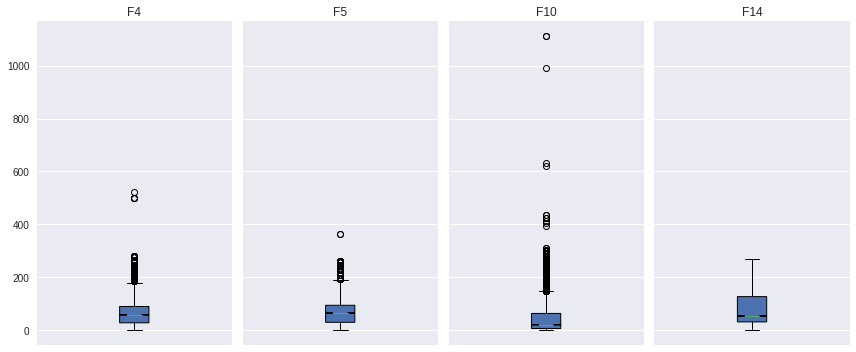

HKLD


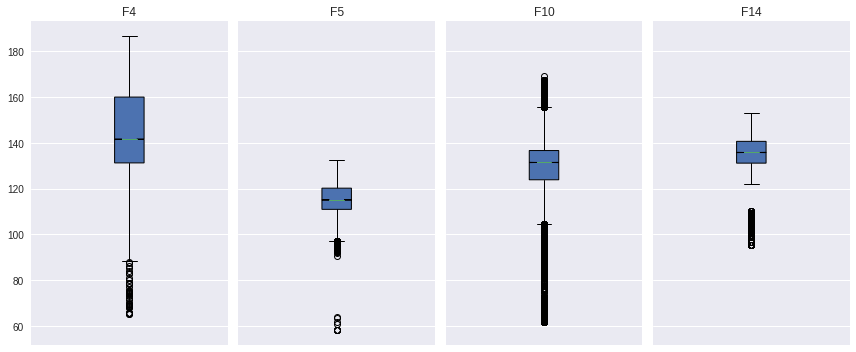

ROP5


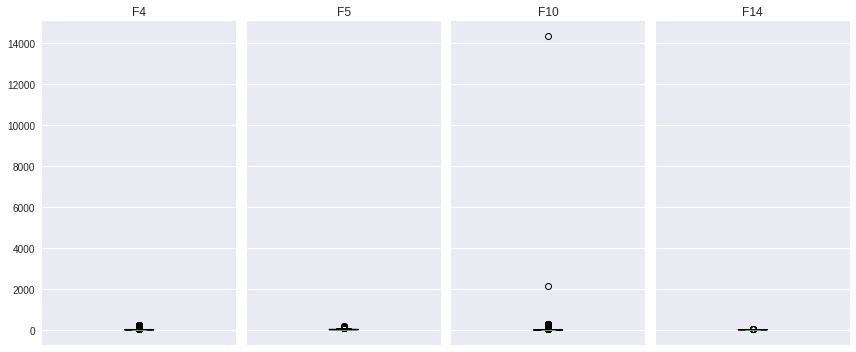

RPM


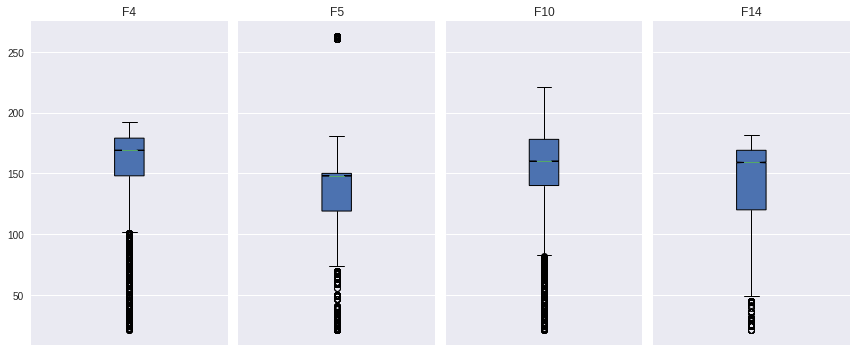

SPPA


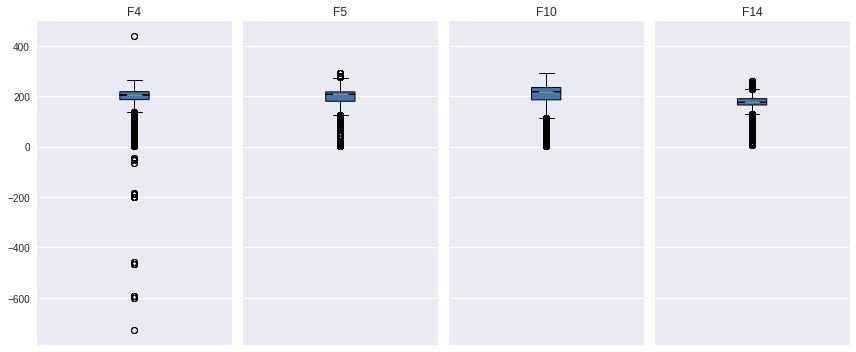

SWOB


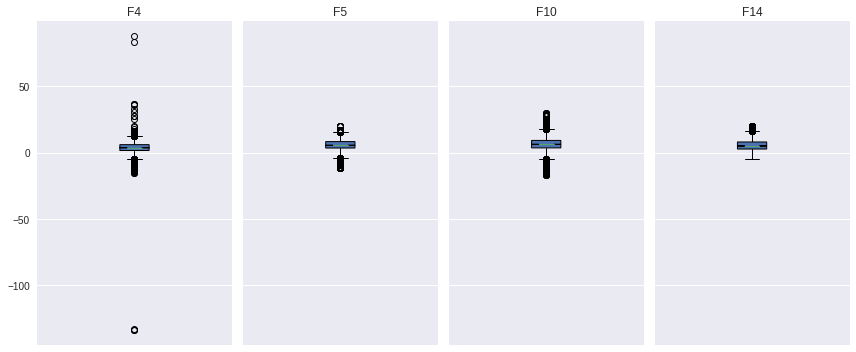

Stick_RT


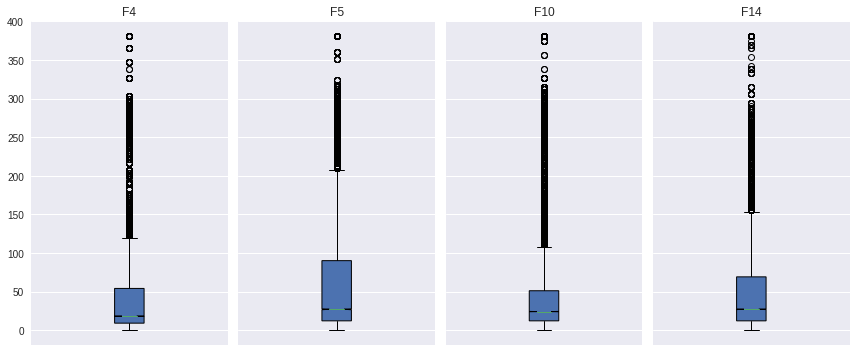

TFLO


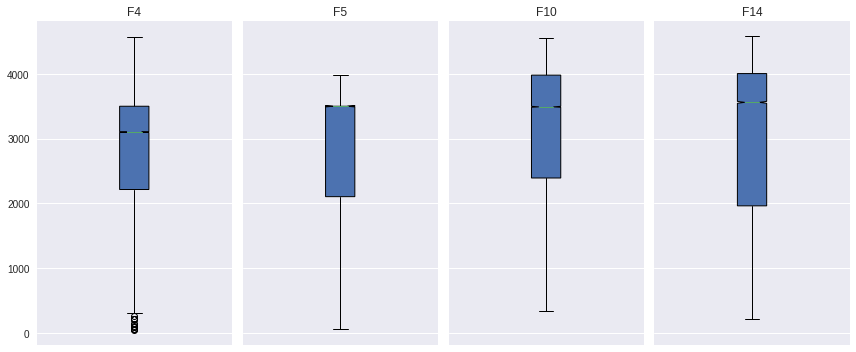

TQA


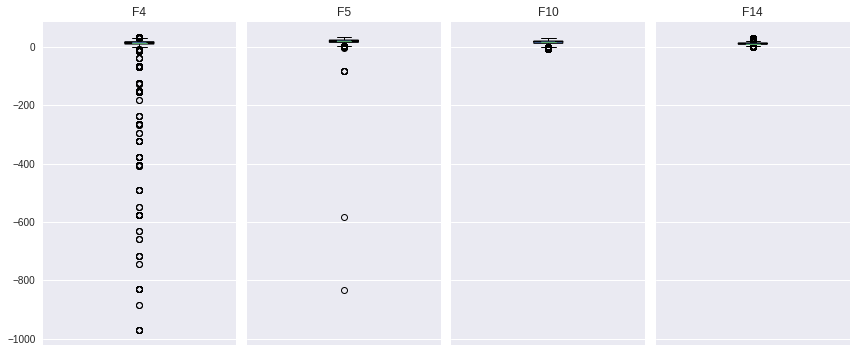

In [11]:
i = 0
for log in cols:
    sc.boxplt_logs(wells,log,cols[i],wells_txt)
    i+=1

Further analysis must be done to check the `BVEL` variable

In [12]:
cols_new = np.sort(wells[0].columns.values)
cols_new

array(['BPOS', 'BVEL', 'DEPT', 'DateTime', 'GR', 'HKLD', 'ROP5', 'RPM',
       'Run', 'SPPA', 'SWOB', 'Stick_RT', 'TFLO', 'TQA', 'Well'],
      dtype=object)

In [13]:
wells_ordered = []
for well in wells:
    df = pd.DataFrame(well,columns=cols_new)
    wells_ordered.append(df)

## Concatenating DataFrames

In [14]:
df =pd.concat(wells_ordered)

In [15]:
df["DateTime"] = pd.to_datetime(df["DateTime"])

In [16]:
df = df.set_index(["DateTime","Stick_RT"])
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 287689 entries, (Timestamp('2007-10-13 15:44:50'), nan) to (Timestamp('2008-06-14 16:29:57'), 27.0)
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   BPOS    287689 non-null  float64
 1   BVEL    287689 non-null  float64
 2   DEPT    287689 non-null  float64
 3   GR      269090 non-null  float64
 4   HKLD    287689 non-null  float64
 5   ROP5    271935 non-null  float64
 6   RPM     287689 non-null  float64
 7   Run     287689 non-null  object 
 8   SPPA    287689 non-null  float64
 9   SWOB    287689 non-null  float64
 10  TFLO    287689 non-null  float64
 11  TQA     287689 non-null  float64
 12  Well    287689 non-null  object 
dtypes: float64(11), object(2)
memory usage: 42.1+ MB


## Outlier removal
> Interquartile range method

In [17]:
df_new = sc.outlier_removal(df)

In [18]:
vars_plt = list(df.columns.difference(['Well',"DateTime","Run"]))

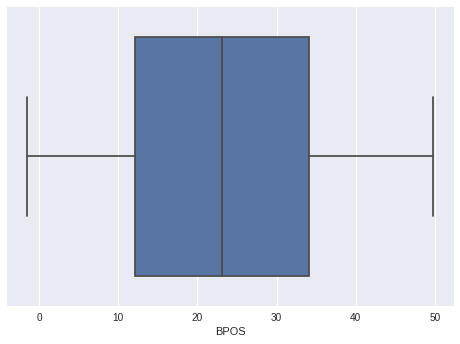

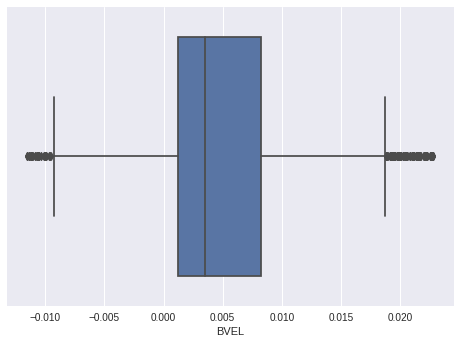

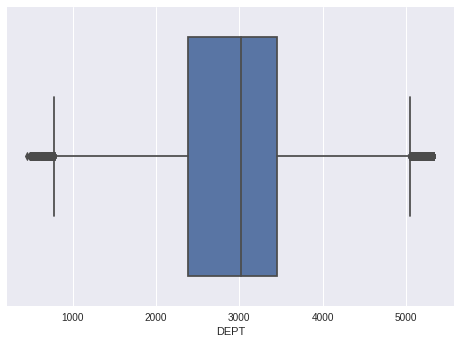

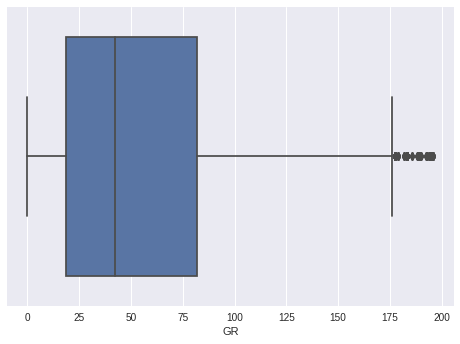

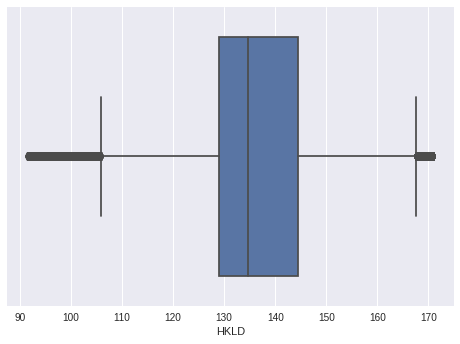

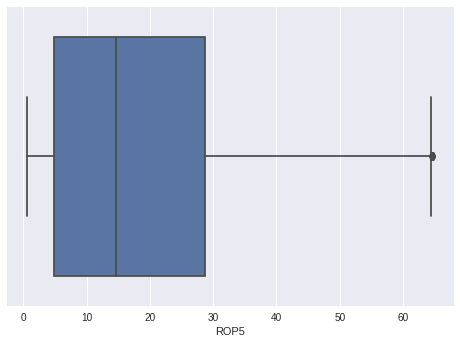

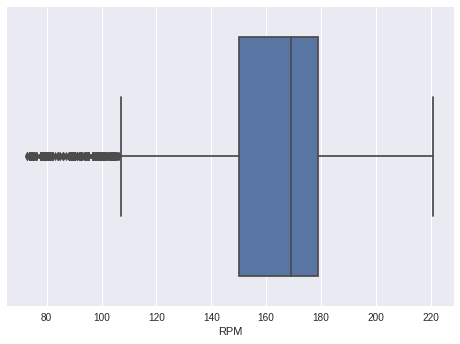

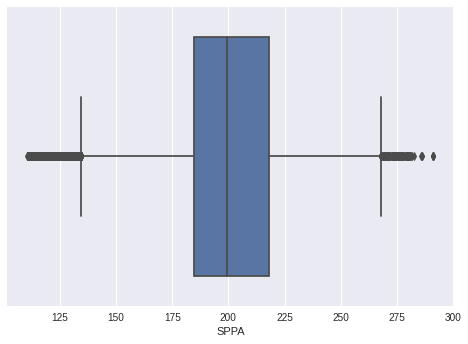

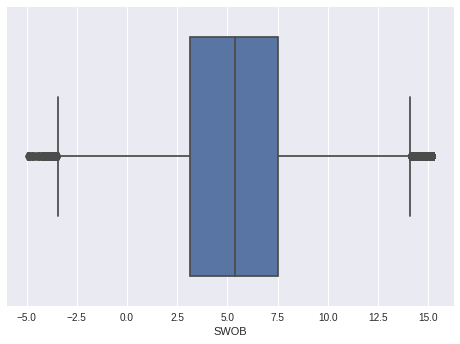

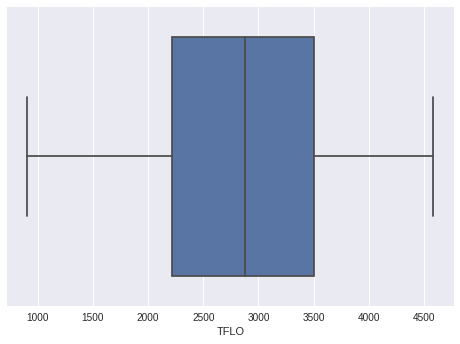

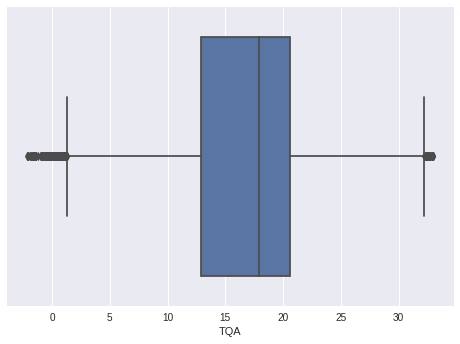

In [19]:
for var in vars_plt:
    sns.boxplot(x = df_new[var])
    plt.show()

In [39]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189279 entries, 0 to 189278
Data columns (total 17 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   level_0   189279 non-null  int64         
 1   index     189279 non-null  int64         
 2   DateTime  189279 non-null  datetime64[ns]
 3   Stick_RT  182182 non-null  float64       
 4   BPOS      189279 non-null  float64       
 5   BVEL      189279 non-null  float64       
 6   DEPT      189279 non-null  float64       
 7   GR        187014 non-null  float64       
 8   HKLD      189279 non-null  float64       
 9   ROP5      188826 non-null  float64       
 10  RPM       189279 non-null  float64       
 11  Run       189279 non-null  object        
 12  SPPA      189279 non-null  float64       
 13  SWOB      189279 non-null  float64       
 14  TFLO      189279 non-null  float64       
 15  TQA       189279 non-null  float64       
 16  Well      189279 non-null  object     

In [41]:
df_new.reset_index(inplace=True)
df_new.drop(["level_0","index"],axis=1,inplace=True)

/home/luis/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [42]:
df_new

,DateTime,Stick_RT,BPOS,BVEL,DEPT,GR,HKLD,ROP5,RPM,Run,SPPA,SWOB,TFLO,TQA,Well
0,2007-10-14 07:24:20,9.0,13.62,0.0200,618.9700,101.31,95.92,64.10,158.0,run_2,111.92,9.66,3766.31,0.78,F-4
1,2007-10-14 07:24:30,9.0,13.48,0.0200,619.1100,101.31,96.03,62.82,158.0,run_2,113.39,9.55,3766.31,0.80,F-4
2,2007-10-14 07:24:40,9.0,13.33,0.0200,619.2600,101.31,95.61,61.90,137.0,run_2,114.86,9.97,3766.31,0.59,F-4
3,2007-10-14 07:24:50,21.0,13.15,0.0200,619.4400,95.83,95.87,60.65,158.0,run_2,115.50,9.71,3766.31,0.79,F-4
4,2007-10-14 07:25:00,21.0,13.11,0.0100,619.4800,95.83,102.03,60.65,158.0,run_2,110.70,3.55,3766.31,0.88,F-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189274,2008-06-14 16:29:07,96.0,31.76,-0.0093,3749.8791,83.71,149.24,22.57,179.0,run_5,182.18,0.98,1962.83,12.87,F-14
189275,2008-06-14 16:29:17,96.0,31.82,-0.0065,3749.8216,83.71,149.27,22.57,179.0,run_5,182.23,0.95,1962.83,12.80,F-14
189276,2008-06-14 16:29:27,96.0,31.82,-0.0004,3749.8222,80.11,149.37,22.57,179.0,run_5,182.23,0.84,1962.83,12.80,F-14
189277,2008-06-14 16:29:37,27.0,31.82,0.0000,3749.8222,80.11,149.40,22.57,180.0,run_5,182.72,0.82,1962.83,13.28,F-14


In [45]:
df_new.to_csv(r"Notebooks-Git/Training/TrainingV1.csv",index=False)